<a href="https://colab.research.google.com/github/wina10222111/10222111_Wina-Apriliani-Rahayu_TM/blob/main/Tugas%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Memasukkan data dari tabel
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'] # Label Target
}

df = pd.DataFrame(data)

In [2]:
# Inisialisasi encoder
le = LabelEncoder()

# Duplikasi dataframe untuk diproses
df_encoded = df.apply(le.fit_transform)

# Menampilkan hasil encoding untuk pengecekan
print(df_encoded.head())

   Age  Income  Student  Credit_Rating  Buy
0    1       0        0              1    0
1    1       0        0              0    0
2    0       0        0              1    1
3    2       2        0              1    1
4    2       1        1              1    1


In [3]:
def hitung_entropy(column):
    counts = np.bincount(column)
    probabilities = counts / len(column)
    entropy = 0
    for p in probabilities:
        if p > 0:
            entropy -= p * np.log2(p)
    return entropy

# Entropy Total
entropy_total = hitung_entropy(df_encoded['Buy'])
print(f"Entropy Total: {entropy_total:.4f}")

Entropy Total: 0.9710


In [4]:
# Memisahkan Fitur (X) dan Target (y)
X = df_encoded.drop('Buy', axis=1)
y = df_encoded['Buy']

# Inisialisasi dan Training Model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

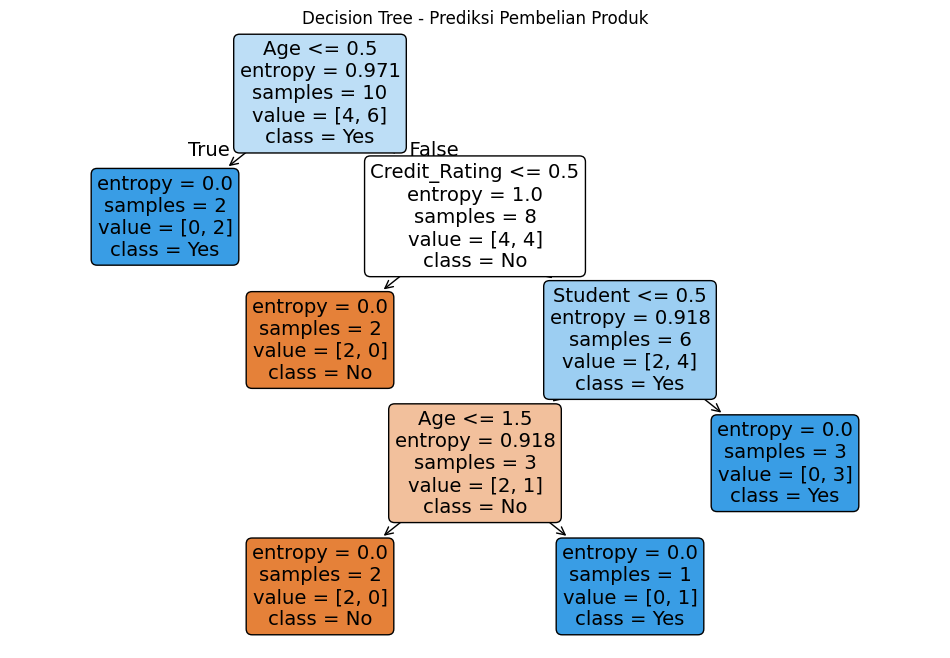

In [5]:
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.title("Decision Tree - Prediksi Pembelian Produk")
plt.show()